In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

## Binary Classificatino with N Features

In [17]:
# set params
n_data, n_feature = 1000, 3
lr = 0.03

t_W = np.random.uniform(-1, 1, (n_feature, 1)) # target weights
t_b = np.random.uniform(-1, 1, (1, ))          # target bias
w = np.random.uniform(-1, 1, (n_feature, 1))   # initial weights
b = np.random.uniform(-1, 1, (1, ))            # initial biass

print('weight shape            : ', w.shape)
print('bias   shape            : ', b.shape)

weight shape            :  (3, 1)
bias   shape            :  (1,)


In [18]:
# generate dataset
x_data = np.random.randn(n_data, n_feature)
y_data = x_data @ t_W + t_b
y_data = 1/(1 + np.exp(-y_data))
y_data = (y_data > 0.5).astype(np.int)

print('input  shape : ',x_data.shape)
print('output shape : ', y_data.shape)

input  shape :  (1000, 3)
output shape :  (1000, 1)


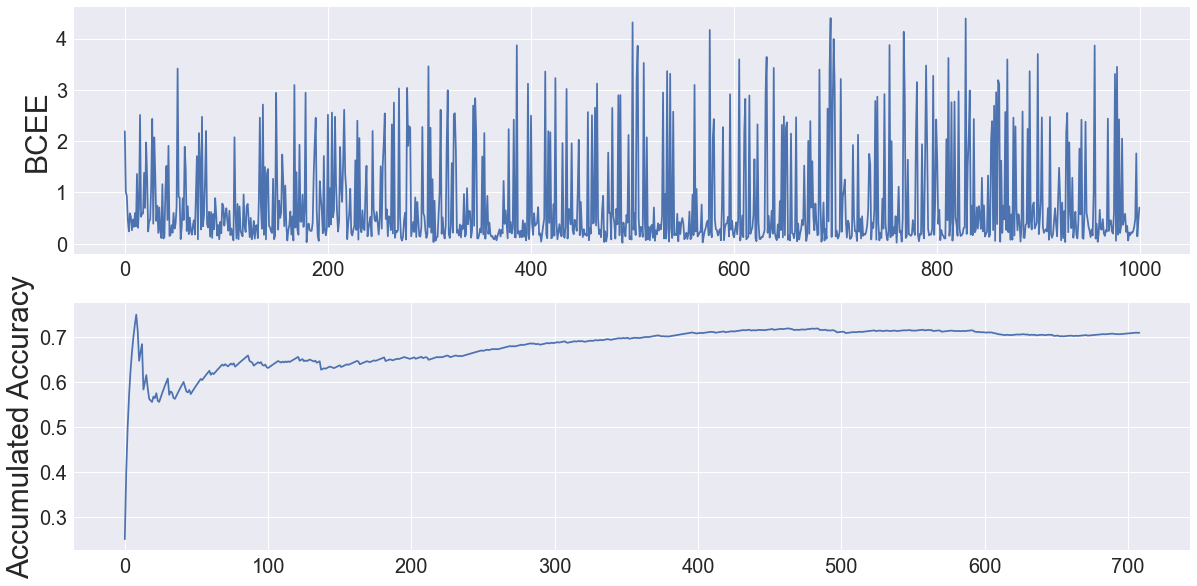

In [19]:
# For tracking Loss, Weight, Bias
J_track, acc_track = list(), list()
n_correct = 0

for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    # Foward Propagation
    pred = x @ w + b
    pred = 1/(1 + np.exp(-pred))
    # print(pred.shape)
    J = -(y*np.log(pred) + (1-y)*np.log(1-pred))
    J_track.append(J)
    
    # Check Prediction
    pred_ = (pred > 0.5).astype(np.int)
    if pred_ == y:
        n_correct += 1
        acc_track.append(n_correct/(data_idx + 1))

    # jacobians
    dJ_dpred = (pred - y)/(pred*(1-pred))   # Binary Cross Entropy Error
    dpred_dz = pred*(1-pred)                # Sigmoid
    dz_dW = x.reshape(1, -1)                # Convert to 2 Dim
    dz_db = 1
    
    # backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dW = dJ_dz * dz_dW
    dJ_db = dJ_dz * dz_db
    # train model
    W = W - lr*dJ_dW.T                      # Convert to Column Vector
    b = b - lr*dJ_db
    
# visualize weight/bias
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)
axes[0].set_ylabel('BCEE', fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].set_ylabel('Accumulated Accuracy', fontsize=30)
axes[1].tick_params(labelsize=20)